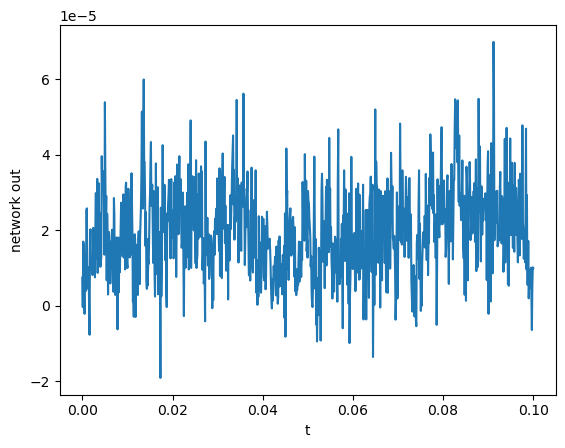

In [1]:
import torch
import numpy as np
import tinycudann as tcnn
import matplotlib.pyplot as plt

device = torch.device('cuda')
encoding = tcnn.Encoding(3, dict(
    otype="HashGrid",
    n_levels=16,
    n_features_per_level=2,
    log2_hashmap_size=14,
    base_resolution=16,
    per_level_scale=2
))
network = tcnn.Network(encoding.n_output_dims, 4, dict(
    # otype="CutlassMLP",
    otype="FullyFusedMLP",
    activation="ReLU",
    output_activation="None",
    n_neurons=64,
    n_hidden_layers=2,
))
net = torch.nn.Sequential(
    encoding, network
).to(device)

d = 2*torch.rand(3, device=device)-1
d = d / torch.linalg.norm(d)
o = torch.zeros((3), device=device)

t = torch.linspace(0, 0.1, 1000, device=device)
inputs = o.reshape(1, 3) + t.reshape(-1, 1) * d.reshape(1, 3)
output = net(inputs)
y = output[:, 1].detach().cpu()
x = t.cpu()
plt.plot(x, y)
# plt.xlabel = "t"
# plt.ylabel = "network out"
plt.xlabel("t")  # Use function call, not assignment
plt.ylabel("network out")  # Use function call, not assignment
plt.show()